# Gaussian XOR and Gaussian R-XOR BTE with Supervised Alignment

In [1]:
import numpy as np

#import functions.xor_rxor_with_icp_functions as fn
import functions.xor_rxor_with_icp_functions as fn
from proglearn.sims import generate_gaussian_parity

Generate Gaussian XOR and R-XOR Data.

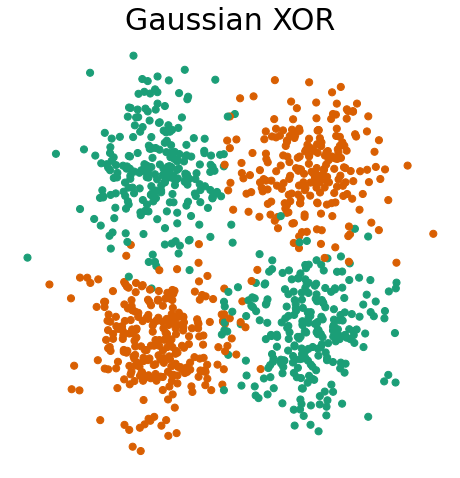

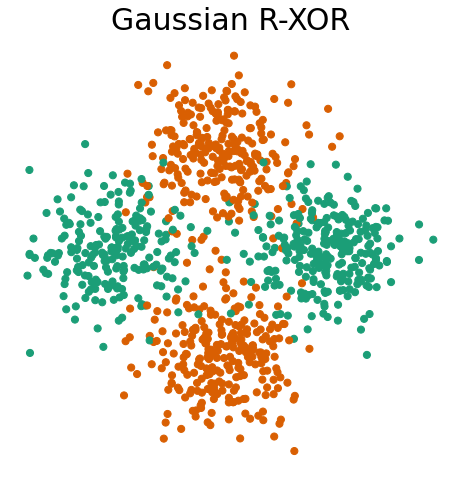

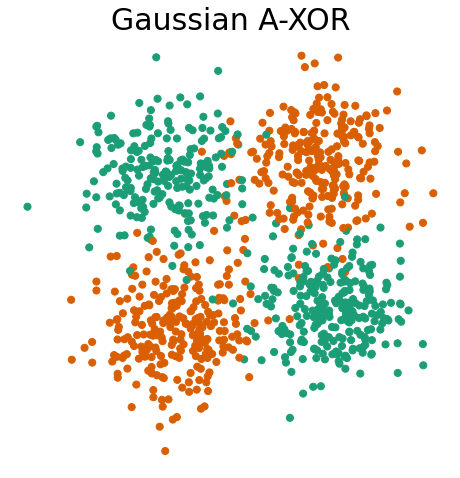

In [2]:
# call function to return gaussian xor and r-xor data:
X_xor, y_xor = generate_gaussian_parity(1000)
X_rxor, y_rxor = generate_gaussian_parity(1000, angle_params=np.pi/4)
# call function to adapt r-xor to xor:
T, X_axor, i = fn.icp(X_rxor.copy(), X_xor.copy(), y_rxor.copy(), y_xor.copy())
X_axor = X_axor.T[:,0:2]

# plot and format:
fn.plot_xor_rxor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_rxor(X_rxor, y_rxor, 'Gaussian R-XOR')
fn.plot_xor_rxor(X_axor, y_rxor, 'Gaussian A-XOR')

Hyperparameters:
- `mc_rep`: number of repetitions to run progressive learning algorithm
- `angle_sweep`: angles to test
- `task1_sample`: number of task 1 samples
- `task2_sample`: number of task 2 samples

In [3]:
angle_sweep = range(0,91,10)
task1_sample = 100
task2_sample = 100
mc_rep = 500

Run with adaptation off

In [4]:
mean_te1 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 469 out of 500 | elapsed:    8.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend Loky

Run with adaptation on

In [5]:
mean_te2 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.2s finishe

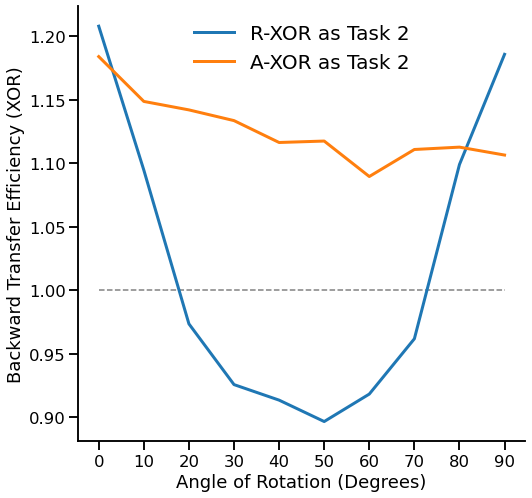

In [6]:
fn.plot_bte_v_angle(angle_sweep, mean_te1, mean_te2)